# Importing Libraries

In [92]:
import pandas as pd
import math
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import drive
#drive.mount('/IMDB_data_NoDup.csv')

# Importing and reading csv movie dataset 
The size of the file is too big 350039x16. So will continue only with the 5000 data. 

In [3]:
IMDB_data_NoDup = "C:\\Users\\vishd\\Desktop\\reetu\\Springboard course\\Data wrangling IMDB dataset\\IMDB_data_NoDup.csv"
#IMDB_data_NoDup.head()
#IMDB_data_NoDup = "/content/IMDB_data_NoDup.csv"
#IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, sep='\t')
#IMDB_data_NoDup.shape
IMDB_data_NoDup = pd.read_csv(IMDB_data_NoDup, sep='\t', nrows = 5000)#, delimiter=',', header=None, skiprows=1)#, names=['LABEL','F1','F2','F3','F4','F5','X','Y','Z','C1','C2'])                                                # loading first files
IMDB_data_NoDup.head()


Index    titleId                                 title region titleType  \
0      0  tt0000019                      The Clown Barber     GB     short   
1      2  tt0271697                    Our New Errand Boy     GB     short   
2      5  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3     14  tt0308848                      Saved by a Dream     GB     short   
4     30  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0     1898.0  Comedy,Short  nm0932055         \N        5.3          19.0   
1     1905.0  Comedy,Short  nm0932055         \N        5.4          98.0   
2     1898.0  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3     1909.0   Drama,Short  nm0932055         \N        6.3           6.0   
4     1908.0   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director birthYear_Director deathYear  \
0     James Williamson             1855.0    1933.0   
1     James Williamson             1855.0    1933.0   
2     James Williamson             1855.0    1933.0   
3     James Williamson             1855.0    1933.0   
4     James Williamson             1855.0    1933.0   

        primaryProfession_director                       Dir_knownForTitles  
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763

# Droping one index col. 
Here we have two columns with index #. Need to drop index. 

In [4]:
IMDB_data_NoDup = IMDB_data_NoDup.drop(['Index'], axis = 1)                                             #dropping index column


# Base Statistics 
Below is the basis statistics for our data set

In [5]:
IMDB_data_NoDup.describe()

startYear    AveRating  Num_of_Votes
count  5000.000000  5000.000000   5000.000000
mean   1926.331600     5.806900     29.539600
std      18.794496     1.241449     45.563438
min    1894.000000     1.000000      5.000000
25%    1912.000000     5.000000      8.000000
50%    1926.000000     5.800000     13.000000
75%    1937.000000     6.600000     31.000000
max    2017.000000    10.000000    590.000000

# Converting years  to numeric columns

In [6]:
#converting year col ot numeric type

In [7]:
IMDB_data_NoDup['startYear'] = pd.to_numeric(IMDB_data_NoDup['startYear'], errors='coerce')
IMDB_data_NoDup['startYear'] = IMDB_data_NoDup["startYear"].convert_dtypes() 

IMDB_data_NoDup['startYear'].unique()

<IntegerArray>
[1898, 1905, 1909, 1908, 1906, 1900, 1901, 1897, 1895, 1896, 1894, 1903, 1899,
 1907, 1910, 1904, 1902, 1913, 1911, 1915, 1912, 1920, 1914, 1923, 1921, 1919,
 1922, 1936, 1916, 1917, 1926, 1932, 1933, 1928, 1927, 1929, 1931, 1935, 1930,
 1918, 1946, 1937, 1938, 1925, 1942, 1944, 1934, 1939, 1924, 2017, 1956, 1945,
 1950, 1940, 1943, 1953, 1954, 1957, 1959, 1960, 1968, 1962, 1964, 1965, 1967,
 1961, 1963, 1969, 1970, 1972, 1966, 1941, 1952, 1955, 1958, 1947, 1948, 1949,
 1951, 2011, 1974, 1973, 2004, 1999, 1971, 1975, 2014, 1977, 1978, 1981, 1982,
 1984, 2005]
Length: 93, dtype: Int64

In [8]:
#Converting death year col to numeric

In [9]:
IMDB_data_NoDup['deathYear'] = pd.to_numeric(IMDB_data_NoDup["deathYear"], errors='coerce')
IMDB_data_NoDup['deathYear'] = IMDB_data_NoDup["deathYear" ].convert_dtypes() 

In [10]:
# converting birthyear_Director col ot Numeric

In [11]:
IMDB_data_NoDup['birthYear_Director'] = pd.to_numeric(IMDB_data_NoDup["birthYear_Director"], errors='coerce')
IMDB_data_NoDup['birthYear_Director'] = IMDB_data_NoDup["birthYear_Director"].convert_dtypes() 


In [12]:
IMDB_data_NoDup.head()

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763  
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763

In [13]:
# We can see the type of startYear is int

In [14]:
IMDB_data_NoDup['startYear'].dtype

Int64Dtype()

In [15]:
# Calculating the age of the movie

In [16]:
Cuurent_year = 2021
IMDB_data_NoDup['Age_of_movie'] = Cuurent_year - IMDB_data_NoDup['startYear'] 

In [17]:
IMDB_data_NoDup.head()

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  \
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   

   Age_of_movie  
0           123  
1           116  
2           123  
3           112  
4           113

In [18]:
IMDB_data_NoDup['Age_of_movie'].unique() 

<IntegerArray>
[123, 116, 112, 113, 115, 121, 120, 124, 126, 125, 127, 118, 122, 114, 111,
 117, 119, 108, 110, 106, 109, 101, 107,  98, 100, 102,  99,  85, 105, 104,
  95,  89,  88,  93,  94,  92,  90,  86,  91, 103,  75,  84,  83,  96,  79,
  77,  87,  82,  97,   4,  65,  76,  71,  81,  78,  68,  67,  64,  62,  61,
  53,  59,  57,  56,  54,  60,  58,  52,  51,  49,  55,  80,  69,  66,  63,
  74,  73,  72,  70,  10,  47,  48,  17,  22,  50,  46,   7,  44,  43,  40,
  39,  37,  16]
Length: 93, dtype: Int64

In [19]:
IMDB_data_NoDup['birthYear_Director'].unique()

<IntegerArray>
[1855, 1854, 1847, 1861, <NA>, 1860, 1873, 1872, 1869, 1874, 1875, 1870, 1864,
 1859, 1851, 1862, 1884, 1880, 1871, 1877, 1868, 1858, 1852, 1867, 1886, 1879,
 1876, 1863, 1885, 1881, 1853, 1878, 1883, 1865, 1882, 1888, 1887, 1857, 1891,
 1894, 1893, 1866, 1890, 1889, 1856, 1892, 1898, 1895, 1899, 1896, 1897, 1901,
 1902, 1900, 1903, 1904, 1908, 1906, 1910, 1905, 1907, 1909, 1911, 1922]
Length: 64, dtype: Int64

# Calculating the age of the directors

In [20]:
IMDB_data_NoDup['Director_age'] = IMDB_data_NoDup['deathYear']  - IMDB_data_NoDup['birthYear_Director'] 
IMDB_data_NoDup.head(2)

titleId               title region titleType  startYear        genres  \
0  tt0000019    The Clown Barber     GB     short       1898  Comedy,Short   
1  tt0271697  Our New Errand Boy     GB     short       1905  Comedy,Short   

   directors writers  AveRating  Num_of_Votes primaryName_Director  \
0  nm0932055      \N        5.3          19.0     James Williamson   
1  nm0932055      \N        5.4          98.0     James Williamson   

   birthYear_Director  deathYear       primaryProfession_director  \
0                1855       1933  director,cinematographer,writer   
1                1855       1933  director,cinematographer,writer   

                        Dir_knownForTitles  Age_of_movie  Director_age  
0  tt0132534,tt0000355,tt0000273,tt0465763           123            78  
1  tt0132534,tt0000355,tt0000273,tt0465763           116            78

# Calculating sts, min, max, mean of the rating columns 

In [26]:
std_Of_AvRating = np.std(IMDB_data_NoDup['AveRating'])
mean_mu = np.mean(IMDB_data_NoDup['AveRating'])
min_Rating = np.min(IMDB_data_NoDup['AveRating'])
max_Rating = np.max(IMDB_data_NoDup['AveRating'])
lowerbound, upperbound = stats.norm.interval(0.95, loc=mean_mu, scale= std_Of_AvRating)

print('std_Of_AvRating:',std_Of_AvRating, 'mean_mu of rating:', mean_mu)
print('min_Of_AvRating:',min_Rating, 'max_Of_AvRating:',min_Rating)
print('lowerbound:', lowerbound, 'upperbound', upperbound)

std_Of_AvRating: 1.2413244499324103 mean_mu of rating: 5.806899999999998
min_Of_AvRating: 1.0 max_Of_AvRating: 1.0
lowerbound: 3.3739487850034804 upperbound 8.239851214996516


In [27]:
#IMDB_data_NoDup['startYear'] = IMDB_data_NoDup['startYear'].astype(str).replace('\.0', '', regex=True)
#IMDB_data_NoDup['startYear'] = IMDB_data_NoDup['startYear'].astype(str).replace('\N', '', regex=True)

# Checking and filling NaN values 

In [28]:
#Checking NaN values
IMDB_data_NoDup['Age_of_movie'].isna().sum()


0

In [29]:
#Converting Age_of_movie to float type
IMDB_data_NoDup['Age_of_movie'] = IMDB_data_NoDup['Age_of_movie'].astype('float')

In [30]:
#Replacing all NaN value with mean of the Age_of_movie column 
IMDB_data_NoDup['Age_of_movie'].fillna((IMDB_data_NoDup['Age_of_movie'].mean()), inplace=True)

In [31]:
IMDB_data_NoDup['Age_of_movie'].value_counts()

109.0    170
124.0    166
91.0     153
108.0    136
123.0    135
        ... 
22.0       1
17.0       1
46.0       1
37.0       1
10.0       1
Name: Age_of_movie, Length: 93, dtype: int64

# dividing Age_of_movie col to bins(decade) of the movies

In [32]:

conditions = [
    # (IMDB_data_NoDup['Age_of_movie'].ndim == 0),
     (IMDB_data_NoDup['Age_of_movie'] <= 1),
     (IMDB_data_NoDup['Age_of_movie'] > 1) & (IMDB_data_NoDup['Age_of_movie'] <= 10), 
     (IMDB_data_NoDup['Age_of_movie'] > 10) & (IMDB_data_NoDup[ 'Age_of_movie'] <= 25),
     (IMDB_data_NoDup['Age_of_movie'] > 25) & (IMDB_data_NoDup['Age_of_movie'] <= 50),
     (IMDB_data_NoDup['Age_of_movie'] > 50) & (IMDB_data_NoDup['Age_of_movie'] <= 75),
     (IMDB_data_NoDup['Age_of_movie'] > 75) & (IMDB_data_NoDup['Age_of_movie'] <= 100),
     (IMDB_data_NoDup['Age_of_movie'] > 100) & (IMDB_data_NoDup['Age_of_movie'] <= 125),
     (IMDB_data_NoDup['Age_of_movie'] > 125) & (IMDB_data_NoDup['Age_of_movie']<= 150),
     (IMDB_data_NoDup['Age_of_movie'] > 150)]

# create a list of the values we want to assign for each condition
values = ['D0','D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8']

IMDB_data_NoDup['Decade']  = np.select(conditions, values) 

IMDB_data_NoDup.head()
    

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  \
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   

   Age_of_movie  Director_age Decade  
0         123.0            78     D6  
1         116.0            78     D6  
2         123.0            78     D6  
3         112.0            78     D6  
4         113.0            78     D6

In [33]:
IMDB_data_NoDup.shape

(5000, 18)

In [34]:
IMDB_data_NoDup['Decade'].value_counts()

D5    2200
D6    1962
D4     753
D7      55
D3      21
D1       6
D2       3
Name: Decade, dtype: int64

In [35]:
IMDB_data_NoDup[IMDB_data_NoDup['Decade'] == '0']

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [36]:
#IMDB_data_NoDup['Genre','TitleType2'] = IMDB_data_NoDup.genres.str.split(",", expand=True)
#df[['First','Last']] = df.Name.str.split("_",expand=True)
#IMDB_data_NoDup['First','Last'] = IMDB_data_NoDup.genres.apply(lambda x: pd.Series(str(x).split(",")))
#IMDB_data_NoDup.head()

# Checking the info of the dataframe


In [37]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     5000 non-null   object 
 1   title                       5000 non-null   object 
 2   region                      5000 non-null   object 
 3   titleType                   5000 non-null   object 
 4   startYear                   5000 non-null   Int64  
 5   genres                      5000 non-null   object 
 6   directors                   5000 non-null   object 
 7   writers                     5000 non-null   object 
 8   AveRating                   5000 non-null   float64
 9   Num_of_Votes                5000 non-null   float64
 10  primaryName_Director        5000 non-null   object 
 11  birthYear_Director          4910 non-null   Int64  
 12  deathYear                   4901 non-null   Int64  
 13  primaryProfession_director  5000 

In [38]:
print(IMDB_data_NoDup.isnull().values.sum())

299


In [39]:
print(IMDB_data_NoDup.isnull().sum())

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64


In [40]:
 #IMDB_data_NoDup.fillna(IMDB_data_NoDup['primaryProfession_director'].value_counts().index[0])

In [41]:
print(IMDB_data_NoDup.isnull().values.sum())

299


In [42]:
# selecting the values by removing the duplicate value and selecting unique values on the basisi of 
#title", "startYear", "primaryName_Director", "birthYear_Director"

In [43]:
DF_uniquevalue = IMDB_data_NoDup.value_counts(["title", "startYear", "primaryName_Director", "birthYear_Director" ]) 
DF_uniquevalue                                                        #selection of dropping column

title                         startYear  primaryName_Director  birthYear_Director
Metro Movietone Revue         1930       Nick Grinde           1893                  2
Old Glory and the Cuban Flag  1898       William Heise         1847                  2
American Flag                 1898       William Heise         1847                  2
Screen Snapshots              1932       Ralph Staub           1899                  2
Metro Movietone Revue         1929       Nick Grinde           1893                  2
                                                                                    ..
He and She                    1898       William K.L. Dickson  1860                  1
He Was Her Man                1937       Friz Freleng          1904                  1
He Forgot to Remember         1944       Hal Yates             1899                  1
Hazafelé                      1940       Arzén von Cserépy     1881                  1
Üzenet a Volgapartról         1942       Alfréd 

# Dropping the duplicate cols after selecting the uniques values from each cols

In [44]:
IMDB_data_NoDup = IMDB_data_NoDup.drop_duplicates(subset=["title", "startYear", "primaryName_Director", "birthYear_Director"])
IMDB_data_NoDup.head()

titleId                                 title region titleType  \
0  tt0000019                      The Clown Barber     GB     short   
1  tt0271697                    Our New Errand Boy     GB     short   
2  tt0274177  Two Naughty Boys Teasing the Cobbler     GB     short   
3  tt0308848                      Saved by a Dream     GB     short   
4  tt0454320                           £100 Reward     GB     short   

   startYear        genres  directors    writers  AveRating  Num_of_Votes  \
0       1898  Comedy,Short  nm0932055         \N        5.3          19.0   
1       1905  Comedy,Short  nm0932055         \N        5.4          98.0   
2       1898  Comedy,Short  nm0932055  nm0932055        4.4           7.0   
3       1909   Drama,Short  nm0932055         \N        6.3           6.0   
4       1908   Drama,Short  nm0932055         \N        5.3          12.0   

  primaryName_Director  birthYear_Director  deathYear  \
0     James Williamson                1855       1933   
1     James Williamson                1855       1933   
2     James Williamson                1855       1933   
3     James Williamson                1855       1933   
4     James Williamson                1855       1933   

        primaryProfession_director                       Dir_knownForTitles  \
0  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
1  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
2  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
3  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   
4  director,cinematographer,writer  tt0132534,tt0000355,tt0000273,tt0465763   

   Age_of_movie  Director_age Decade  
0         123.0            78     D6  
1         116.0            78     D6  
2         123.0            78     D6  
3         112.0            78     D6  
4         113.0            78     D6

In [45]:
IMDB_data_NoDup.shape

(4995, 18)

In [46]:
# verification of the duplicationg of the cols.

Ver_dup = IMDB_data_NoDup[IMDB_data_NoDup['title'] == "Pilot"]
Ver_dup

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [47]:
IMDB_data_NoDup['title'].value_counts().count()

4934

In [48]:
IMDB_data_NoDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4905 non-null   Int64  
 12  deathYear                   4896 non-null   Int64  
 13  primaryProfession_director  4995 

In [49]:
print(IMDB_data_NoDup.isnull().sum())

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64


In [50]:
b = IMDB_data_NoDup[IMDB_data_NoDup['title'] == "Pilot"]                       # Checking pilot(duplicate)
b.shape

(0, 18)

In [51]:
IMDB_data_NoDup_copy = IMDB_data_NoDup.copy()

In [52]:
IMDB_data_NoDup_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4905 non-null   Int64  
 12  deathYear                   4896 non-null   Int64  
 13  primaryProfession_director  4995 

In [53]:
# We can see the missing values in birthYear_Director, deathYear and Director_age. In next step we will 
#replace all missing values with mean values of the respective columns

In [54]:
# checking the value and percentage of missing values

In [55]:
#IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull().sum()
IMDB_data_NoDup_copy.isnull().sum()

titleId                         0
title                           0
region                          0
titleType                       0
startYear                       0
genres                          0
directors                       0
writers                         0
AveRating                       0
Num_of_Votes                    0
primaryName_Director            0
birthYear_Director             90
deathYear                      99
primaryProfession_director      0
Dir_knownForTitles              0
Age_of_movie                    0
Director_age                  110
Decade                          0
dtype: int64

In [56]:
IMDB_data_NoDup_copy.isna().sum()/(len(IMDB_data_NoDup_copy))*100

titleId                       0.000000
title                         0.000000
region                        0.000000
titleType                     0.000000
startYear                     0.000000
genres                        0.000000
directors                     0.000000
writers                       0.000000
AveRating                     0.000000
Num_of_Votes                  0.000000
primaryName_Director          0.000000
birthYear_Director            1.801802
deathYear                     1.981982
primaryProfession_director    0.000000
Dir_knownForTitles            0.000000
Age_of_movie                  0.000000
Director_age                  2.202202
Decade                        0.000000
dtype: float64

In [57]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull()].head(2)        # priting Coluumn with null values

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [58]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy.isnull().any(axis=1)].head(2)      #Checking Null values in df

titleId                                              title region  \
130  tt0000053  A Chegada do Comboio Inaugural à Estação Centr...     PT   
131  tt0138358  A Chegada do Rebocador 'Liberal' ao Porto de L...     PT   

    titleType  startYear             genres  directors writers  AveRating  \
130     short       1897  Documentary,Short  nm0684607      \N        2.8   
131     short       1897  Documentary,Short  nm0684607      \N        4.9   

     Num_of_Votes     primaryName_Director  birthYear_Director  deathYear  \
130           8.0  Francisco Pinto Moreira                <NA>       <NA>   
131           7.0  Francisco Pinto Moreira                <NA>       <NA>   

    primaryProfession_director             Dir_knownForTitles  Age_of_movie  \
130                   director  tt0138450,tt0000053,tt0138358         124.0   
131                   director  tt0138450,tt0000053,tt0138358         124.0   

     Director_age Decade  
130          <NA>     D6  
131          <NA>     D6

In [59]:
 # replacing startyear Null value with mean
IMDB_data_NoDup_copy['startYear'].fillna((IMDB_data_NoDup_copy['startYear'].mean()), inplace=True)

In [60]:
# verifying mean Replacement

In [61]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['title'] == "The Wonderful World of Wilbur Pope"]    
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['title'] == "Barnyard WAAC"]  

Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [62]:
# Checkin Null values in Column birthYear_Director 

In [63]:
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['birthYear_Director'].isnull()].head(2)   

titleId                                              title region  \
130  tt0000053  A Chegada do Comboio Inaugural à Estação Centr...     PT   
131  tt0138358  A Chegada do Rebocador 'Liberal' ao Porto de L...     PT   

    titleType  startYear             genres  directors writers  AveRating  \
130     short       1897  Documentary,Short  nm0684607      \N        2.8   
131     short       1897  Documentary,Short  nm0684607      \N        4.9   

     Num_of_Votes     primaryName_Director  birthYear_Director  deathYear  \
130           8.0  Francisco Pinto Moreira                <NA>       <NA>   
131           7.0  Francisco Pinto Moreira                <NA>       <NA>   

    primaryProfession_director             Dir_knownForTitles  Age_of_movie  \
130                   director  tt0138450,tt0000053,tt0138358         124.0   
131                   director  tt0138450,tt0000053,tt0138358         124.0   

     Director_age Decade  
130          <NA>     D6  
131          <NA>     D6

In [72]:
#Replacing Null values with mean
#IMDB_data_NoDup['startYear'].fillna((IMDB_data_NoDup['startYear'].mean()), inplace=True)

IMDB_data_NoDup_copy['birthYear_Director'] = IMDB_data_NoDup_copy['birthYear_Director'].astype('float')
IMDB_data_NoDup_copy['deathYear'] = IMDB_data_NoDup_copy['deathYear'].astype('float')
IMDB_data_NoDup_copy['Director_age'] = IMDB_data_NoDup_copy['Director_age'].astype('float')



IMDB_data_NoDup_copy['birthYear_Director'].fillna((IMDB_data_NoDup_copy['birthYear_Director'].mean()), inplace = True)
IMDB_data_NoDup_copy['deathYear'].fillna((IMDB_data_NoDup_copy['deathYear'].mean()), inplace = True)
IMDB_data_NoDup_copy['Director_age'].fillna((IMDB_data_NoDup_copy['Director_age'].mean()), inplace = True) 
 

In [73]:
# checking columns after fillna 
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['primaryName_Director'] == "Francisco Pinto Moreira"] 

titleId                                              title region  \
130  tt0000053  A Chegada do Comboio Inaugural à Estação Centr...     PT   
131  tt0138358  A Chegada do Rebocador 'Liberal' ao Porto de L...     PT   

    titleType  startYear             genres  directors writers  AveRating  \
130     short       1897  Documentary,Short  nm0684607      \N        2.8   
131     short       1897  Documentary,Short  nm0684607      \N        4.9   

     Num_of_Votes     primaryName_Director  birthYear_Director    deathYear  \
130           8.0  Francisco Pinto Moreira         1885.482161  1958.044322   
131           7.0  Francisco Pinto Moreira         1885.482161  1958.044322   

    primaryProfession_director             Dir_knownForTitles  Age_of_movie  \
130                   director  tt0138450,tt0000053,tt0138358         124.0   
131                   director  tt0138450,tt0000053,tt0138358         124.0   

     Director_age Decade  
130     72.595701     D6  
131     72.595701     D6

In [74]:
# Checking NUll values after replacemnet
    #IMDB_data_NoDup_copy[IMDB_data_NoDup_copy['startYear'].isnull()]
IMDB_data_NoDup_copy[IMDB_data_NoDup_copy.isnull().any(axis=1)].head(2)          


Empty DataFrame
Columns: [titleId, title, region, titleType, startYear, genres, directors, writers, AveRating, Num_of_Votes, primaryName_Director, birthYear_Director, deathYear, primaryProfession_director, Dir_knownForTitles, Age_of_movie, Director_age, Decade]
Index: []

In [75]:
# checking value after replacing all null values
IMDB_data_NoDup_copy.info()                        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   titleId                     4995 non-null   object 
 1   title                       4995 non-null   object 
 2   region                      4995 non-null   object 
 3   titleType                   4995 non-null   object 
 4   startYear                   4995 non-null   Int64  
 5   genres                      4995 non-null   object 
 6   directors                   4995 non-null   object 
 7   writers                     4995 non-null   object 
 8   AveRating                   4995 non-null   float64
 9   Num_of_Votes                4995 non-null   float64
 10  primaryName_Director        4995 non-null   object 
 11  birthYear_Director          4995 non-null   float64
 12  deathYear                   4995 non-null   float64
 13  primaryProfession_director  4995 

In [76]:
# value count for duplicates 
IMDB_data_NoDup_copy['title'].value_counts() 

Faust                  3
One Touch of Nature    3
Hamlet                 3
Silas Marner           3
The Reckoning          3
                      ..
A Home Spun Hero       1
A Link in the Chain    1
Brother Alfred         1
Psohlavci              1
Oil's Well             1
Name: title, Length: 4934, dtype: int64

# EDA : Pairplot 

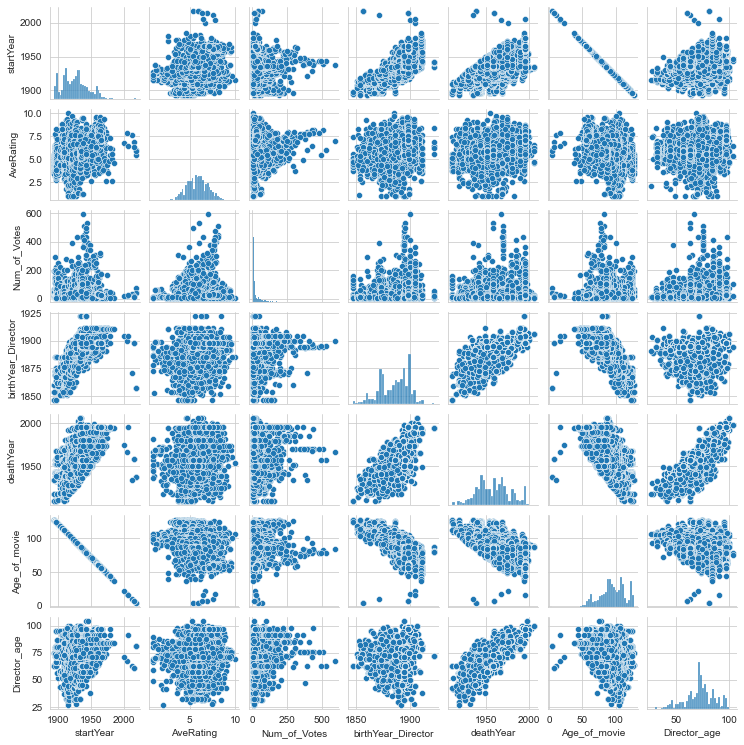

In [98]:
sns.set_style("whitegrid");
sns.pairplot(IMDB_data_NoDup_copy, height = 1.5)
plt.show()


In [103]:
#sns.heatmap(IMDB_data_NoDup_copy)

[Text(0.5, 1.0, 'Histogram: AveRating')]

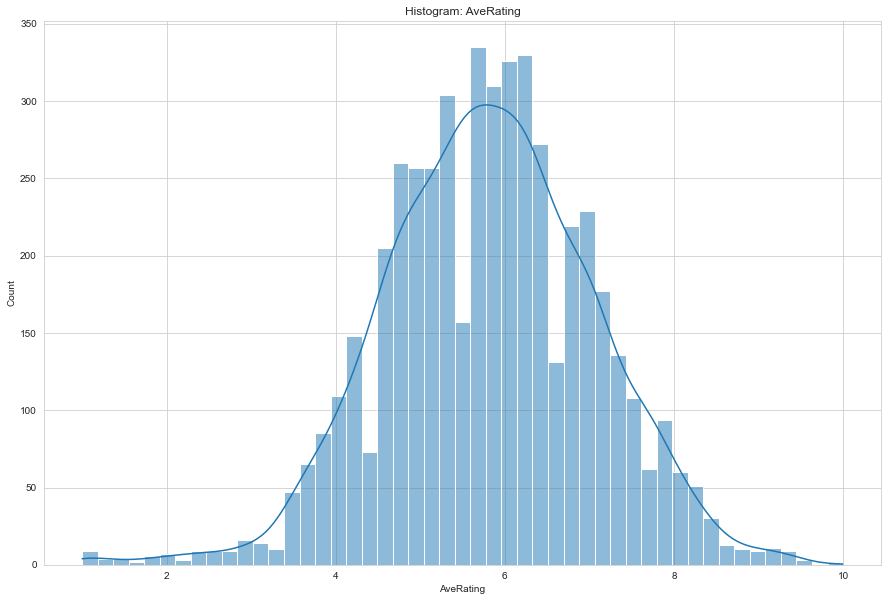

In [127]:
plt.figure(figsize=(15,10))
sns.histplot(data = IMDB_data_NoDup_copy,x = 'AveRating', kde = True).set(title='Histogram: AveRating')


In [ ]:
# AveRating are normally distributed. 

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs startYear')]

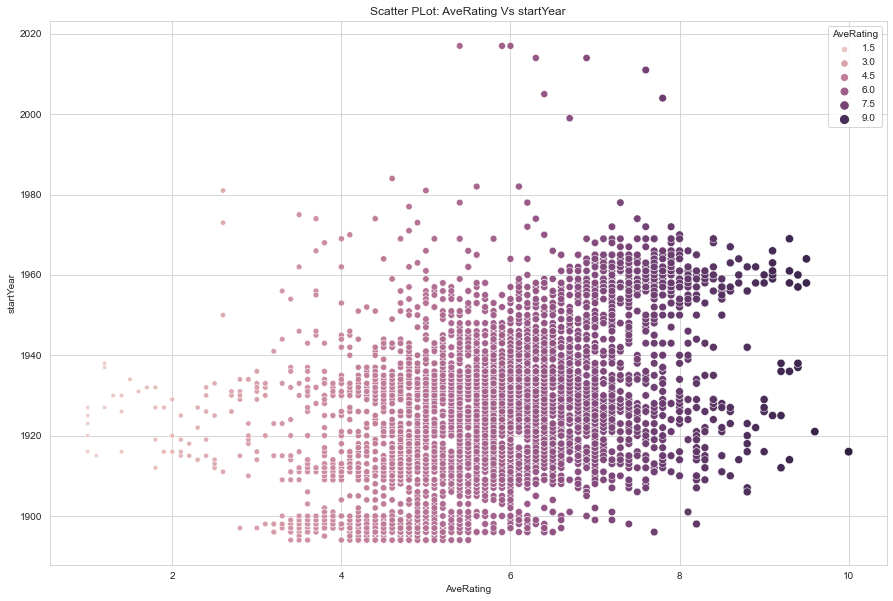

In [126]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="startYear", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs startYear')
                

# BoxPlot: AveRating Vs startYear 

<AxesSubplot:xlabel='AveRating', ylabel='startYear'>

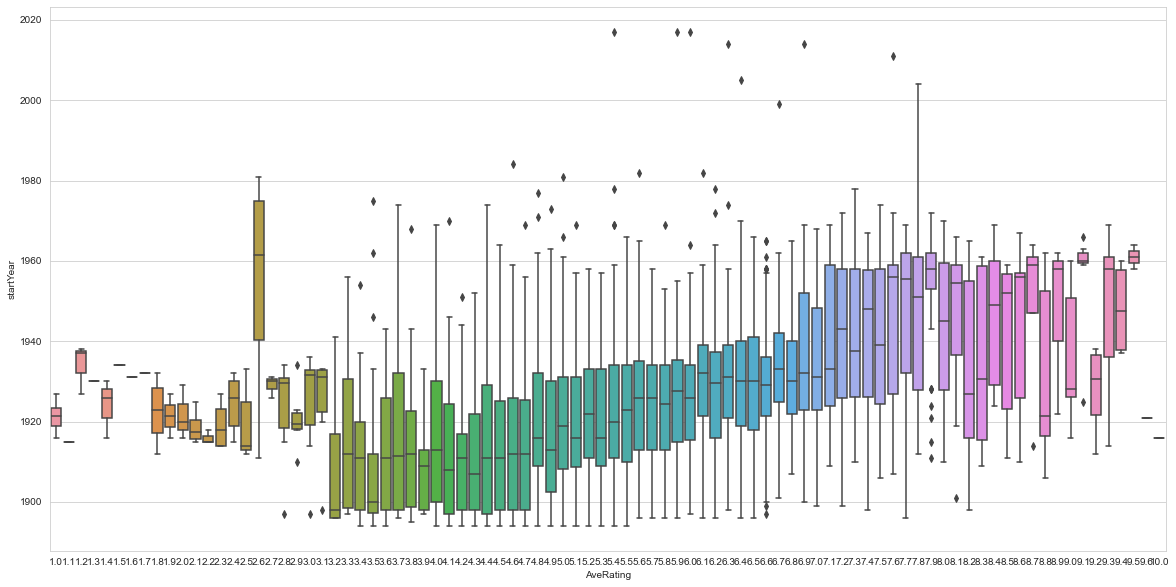

In [137]:
plt.figure(figsize=(20,10))
sns.boxplot(data=IMDB_data_NoDup_copy, x="AveRating", y="startYear")

# Scatterplot: AveRating Vs Num_of_Votes

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Num_of_Votes')]

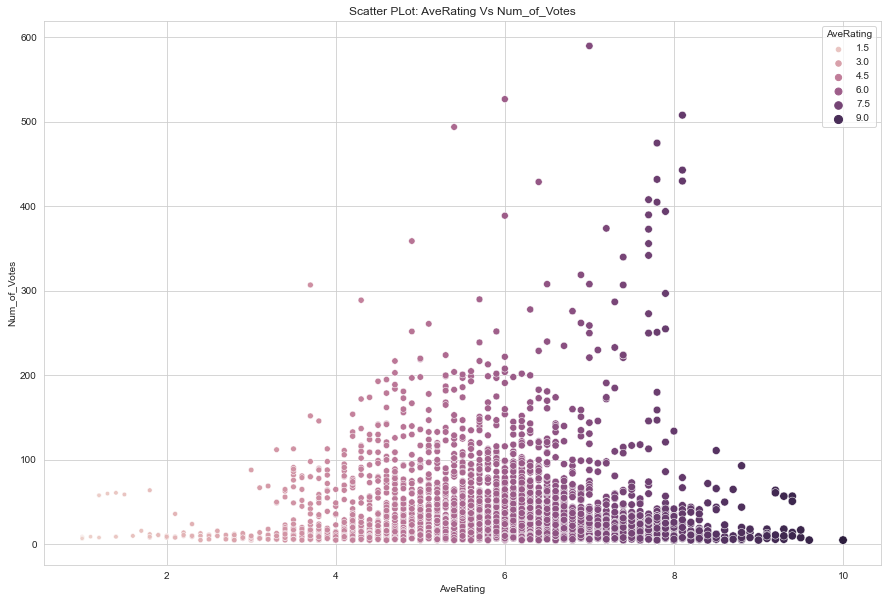

In [138]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Num_of_Votes", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Num_of_Votes')

# ScatterPLot: AveRating Vs Dirctor_age

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Director_age')]

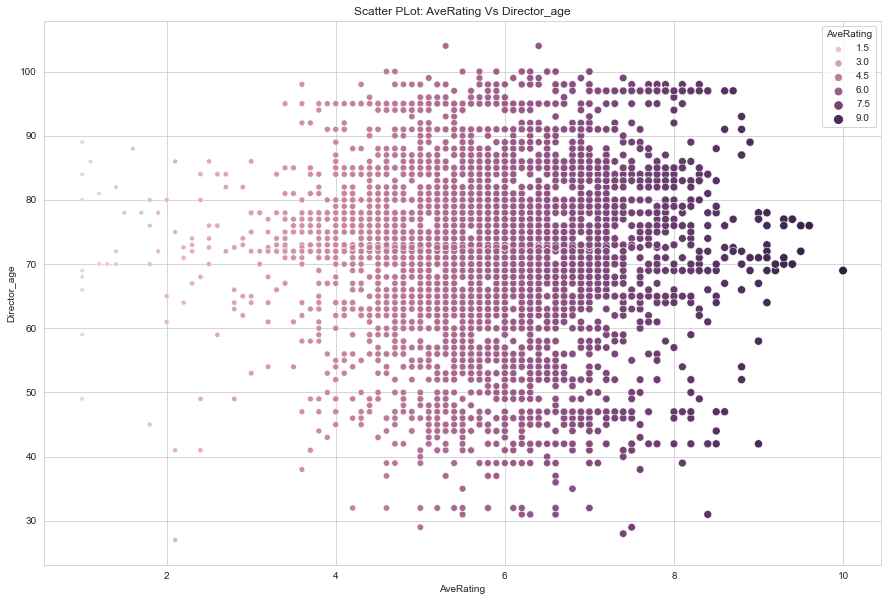

In [139]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Director_age", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Director_age')

In [140]:
# Director's age isn't really affecting the rating of the movie. We can see their is no such pattern where age is related to good 
#movie. High rated movie can be made by any age group of the directors. 

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Director_age')]

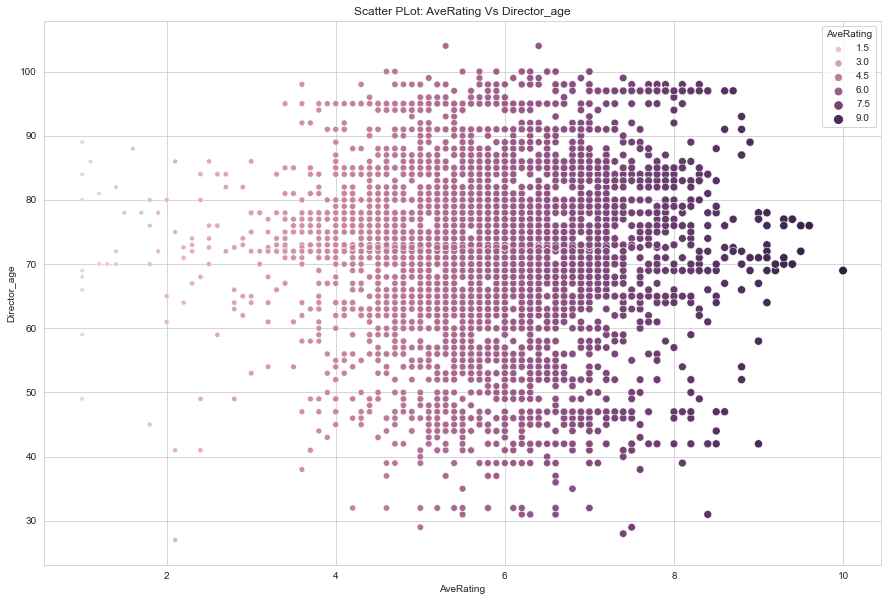

In [141]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Director_age", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Director_age')

In [100]:
fig = px.histogram(IMDB_data_NoDup_copyjmmnb vmvcmmcxzxmc

In [ ]:
fig = px.histogram(IMDB_data_NoDup_copy, 
                   x='region',
                   y = 'AveRating',
                   marginal='box', 
                   nbins=47, 
                   title='AveRating Vs region')
fig.update_layout(bargap=0.1)
fig.show()

In [102]:
fig = px.histogram(IMDB_data_NoDup_copy, 
                   x='region',
                   y = 'AveRating',
                   marginal='box', 
                   nbins=47, 
                   title='AveRating Vs region')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
# Scatter plot between region and AveRating

In [105]:
fig = px.scatter(IMDB_data_NoDup_copy, 
                   x='region',
                   y = 'AveRating',
                   #marginal='box', 
                   #nbins=47, 
                   title='AveRating Vs region')
fig.update_layout(bargap=0.1)
fig.show()

In [108]:
#Plot between AveRating Vs titleType

In [109]:
fig = px.bar(IMDB_data_NoDup_copy, 
                   x='titleType',
                   y = 'AveRating',
                   #marginal='box', 
                   #nbins=47, 
                   title='AveRating Vs titleType')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#plot between startYear and AveRating

In [113]:
fig = px.scatter(IMDB_data_NoDup_copy, 
                   x='startYear',
                   y = 'AveRating',
                   #marginal='box', 
                   #nbins=47, 
                   title='AveRating Vs startYear')
fig.update_layout(bargap=0.1)
fig.show()

In [121]:
fig = px.scatter(IMDB_data_NoDup_copy, 
                   x='genres',
                   y = 'AveRating',
                   #marginal='box', 
                   #nbins=47, 
                   title='AveRating Vs genres')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#Plot between directors and AveRating

In [129]:
fig = px.bar(IMDB_data_NoDup_copy, 
                   x='directors',
                   y = 'AveRating',
                   #marginal='box', 
                   #nbins=47, 
                   title='AveRating Vs directors')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#Plot between AveRating Vs directors.

In [130]:
fig = px.bar(IMDB_data_NoDup_copy, 
                   x='directors',
                   y = 'Num_of_Votes',
                   #marginal='box', 
                   #nbins=47, 
                   title='Num_of_Votes Vs directors')
fig.update_layout(bargap=0.1)
fig.show()

In [164]:
fig = px.scatter(IMDB_data_NoDup_copy, 
                   x= 'Director_age',
                   y = IMDB_data_NoDup_copy['AveRating'] ,
                   #marginal='box', 
                   #nbins=47, 
                   title='Director_age Vs Ave_Rating')
fig.update_layout(bargap=0.1)
fig.show()

#Director_age

In [154]:
fig = px.bar(IMDB_data_NoDup_copy, 
                   x='Decade',
                   y = IMDB_data_NoDup_copy['AveRating'] > 9,
     
                   #marginal='box', 
                   #nbins=47, 
                   title='Decade Vs Ave_Rating')
fig.update_layout(bargap=0.1)
fig.show()
#print(y)

In [142]:
fig = px.bar(IMDB_data_NoDup_copy, 
                   x='primaryProfession_director',
                   y = 'AveRating',
                   #marginal='box', 
                   #nbins=47, 
                   title='primaryProfession_director Vs Ave_Rating')
fig.update_layout(bargap=0.1)
fig.show()

In [143]:
#fig = px.barplot(IMDB_data_NoDup_copy, 
fig = px.bar(IMDB_data_NoDup_copy, x='title', y='AveRating')#, color='title', title="Movie_tile Vs Rating")
fig.show()

In [78]:
## selection of y 
y = IMDB_data_NoDup_copy[['AveRating']]#.set_index(['AveRating'])
print(y)
y.shape

      AveRating
0           5.3
1           5.4
2           4.4
3           6.3
4           5.3
...         ...
4995        8.0
4996        7.6
4997        7.5
4998        7.5
4999        7.1

[4995 rows x 1 columns]


(4995, 1)

In [79]:
# selection of X and y 

X = IMDB_data_NoDup_copy.drop(['AveRating'], axis = 1)#.set_index(['AveRating'])
#print(X)
X.shape


(4995, 17)

In [80]:
#df = df[['geoName', 'geoCode', 'value']].set_index(
            #['geoName']).sort_index()

In [82]:
# split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(y_train)
type(X_train)

      AveRating
2668        3.6
3938        5.7
3857        6.3
4576        6.4
1336        6.2
...         ...
4504        4.3
4991        7.2
3041        5.1
2475        5.4
1784        5.6

[3996 rows x 1 columns]


pandas.core.frame.DataFrame

In [83]:
from sklearn.preprocessing import OneHotEncoder

#all_encoder = []    
class MultiColumnLabelEncoder():
    all_encoder = []
       
    def __init__(self, dataSource, sourceColumnNames):
        self.dataSource = dataSource
        self.sourceColumnNames = sourceColumnNames

    def fit(self):
        for col in self.sourceColumnNames:
            encoder = OneHotEncoder(handle_unknown = "ignore")
            encoder = encoder.fit(self.dataSource[col])
            self.all_encoder.append(encoder) 
            
    def transform(self, test_data):
        final_data = []
        
        for i,col in enumerate(self.sourceColumnNames):
            data = self.all_encoder[i].transform(test_data[col])
            final_data =np.append(final_data,[data])
        #print(self.dataSource[col])
        #print(type(pd.DataFrame(self.all_encoder)))
        return final_data
            
              

In [84]:
columns = [['titleId', "title",'region', 'titleType','directors', 'writers', 'primaryName_Director', 
                                             'primaryProfession_director', 'Dir_knownForTitles', 'Decade']]
#Y_col = [['AveRating']]

data_coder = MultiColumnLabelEncoder(X_train, columns)
#print(Coder_XTrain.shape)
data_coder.fit()
#print(Coder_XTrain.shape)
#Coder_Xtest = MultiColumnLabelEncoder(X_test, columns)
Xtest_data = data_coder.transform(X_test)
print(Xtest_data[0].shape)


Xtrain_data = data_coder.transform(X_train)
print(Xtrain_data[0].shape)

#Xtest_data = pd.DataFrame(Xtest_data)
#print(type(Xtest_data))


#print(Coder_Xtest.shape)

#Xtrain_data = pd.DataFrame(Xtrain_data)
#print(type(Xtrain_data))
print(Xtrain_data)

(999, 12163)
(3996, 12163)
[<3996x12163 sparse matrix of type '<class 'numpy.float64'>'
 	with 39960 stored elements in Compressed Sparse Row format>]


In [68]:
from sklearn.preprocessing import MultiLabelBinarizer
 
    
#MLB_encoder = []    
class MultiLabelBinarizer1():
    MLB_encoder = []
    
    def __init__(self, dataSource, sourceColumnNames):
        self.dataSource = dataSource
        self.sourceColumnNames = sourceColumnNames

    def fit(self):
        #self.MLB_encoder = []
       
        for col in self.sourceColumnNames:
            ML_coder = MultiLabelBinarizer()
            ML_coder = ML_coder.fit(self.dataSource[col])
            self.MLB_encoder.append(ML_coder)
      
    def transform(self, test_data2):
        ML_data = []
        for i,col in enumerate(self.sourceColumnNames):
            B_data = self.MLB_encoder[i].transform(test_data2[col])
            #print(data)
            ML_data =np.append(ML_data,[B_data])
            
        return ML_data
              

In [69]:
colum = [['genres', "Dir_knownForTitles"]]


M_Coder_XTrain = MultiLabelBinarizer1(X_train, colum)
M_Coder_XTrain.fit()


#MultiLabelBinarizer1(X_test, colum)
X_tain2 = M_Coder_XTrain.transform(X_train)
print(X_tain2.shape)
X_test2 = M_Coder_XTrain.transform(X_test)
print(X_test2.shape)
#print(M_Coder_XTest)
#Coder.sourceColumnNames

(30,)
(30,)


In [70]:
#print(X_train["titleId"])
print(Xtrain_data[0])

  (0, 72)	1.0
  (0, 7180)	1.0
  (0, 7974)	1.0
  (0, 7989)	1.0
  (0, 8292)	1.0
  (0, 8742)	1.0
  (0, 11208)	1.0
  (0, 11295)	1.0
  (0, 12066)	1.0
  (0, 12107)	1.0
  (1, 719)	1.0
  (1, 5595)	1.0
  (1, 7985)	1.0
  (1, 7989)	1.0
  (1, 8232)	1.0
  (1, 8742)	1.0
  (1, 10623)	1.0
  (1, 11267)	1.0
  (1, 11794)	1.0
  (1, 12106)	1.0
  (2, 2313)	1.0
  (2, 4653)	1.0
  (2, 7985)	1.0
  (2, 7989)	1.0
  (2, 8711)	1.0
  :	:
  (3993, 8742)	1.0
  (3993, 10664)	1.0
  (3993, 11262)	1.0
  (3993, 11405)	1.0
  (3993, 12107)	1.0
  (3994, 1656)	1.0
  (3994, 6046)	1.0
  (3994, 7978)	1.0
  (3994, 7988)	1.0
  (3994, 8616)	1.0
  (3994, 9246)	1.0
  (3994, 10770)	1.0
  (3994, 11284)	1.0
  (3994, 11852)	1.0
  (3994, 12105)	1.0
  (3995, 1347)	1.0
  (3995, 4677)	1.0
  (3995, 7985)	1.0
  (3995, 7989)	1.0
  (3995, 8252)	1.0
  (3995, 8742)	1.0
  (3995, 10728)	1.0
  (3995, 11298)	1.0
  (3995, 11937)	1.0
  (3995, 12106)	1.0


In [71]:
print(Xtrain_data.shape)
print(Xtest_data.shape)

(1,)
(1,)


In [72]:
#Modelling 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#Training the model.
reg.fit(Xtrain_data[0], y_train)

#Predict test data set.
y_pred = reg.predict(Xtest_data[0])
#print(y_pred)




print(y_pred.shape)
print("xtrain" ,Xtrain_data[0].shape)
print("y_train", y_train.shape)
print("xtest" ,  Xtest_data[0].shape)
print("y_test", y_test.shape)



#predictions = model.predict(inputs)
#model.fit(inputs, targets)

(999, 1)
xtrain (3996, 12109)
y_train (3996, 1)
xtest (999, 12109)
y_test (999, 1)


In [73]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import math


print("intercept_:", reg.intercept_)
print("reg.coef_", reg.coef_)


MSE = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", "{:.2f}".format(MSE))

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", "{:.2f}".format(RMSE))

#print(r2_score(y_test, y_pred))

print("R-Squared:", "{:.2f}".format(metrics.r2_score(y_test, y_pred)))
#print(RMSE)
      


intercept_: [6.51249043]
reg.coef_ [[-0.17540662  0.02890671 -0.18824179 ...  0.19786148 -0.27091935
  -0.61495755]]
Mean Square Error: 1.15
Root Mean Square Error: 1.07
R-Squared: 0.26


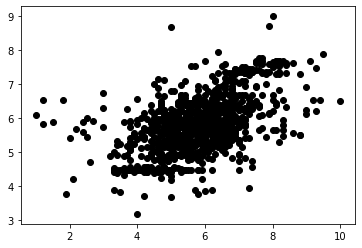

In [87]:
# Plot outputs
#x = Xtest_data.iloc[:, :0].values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='black')
#plt.plot(y_test, y_pred, color='blue')

#plt.xticks(())
#plt.yticks(())

plt.show()


No handles with labels found to put in legend.


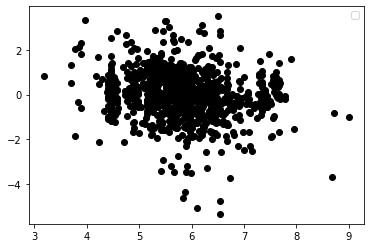

In [84]:
# Plot outputs
#x = Xtest_data.iloc[:, :0].values
import matplotlib.pyplot as plt
plt.scatter(y_pred, (y_test - y_pred), color='black')
#plt.plot(y_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()


In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SGDreg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
SGDreg.fit(y_test, y_pred)

C:\Users\vishd\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [73]:
# 

# diff between r2 and adjusted r2 https://medium.com/analytics-vidhya/measuring-the-goodness-of-fit-r%C2%B2-versus-adjusted-r%C2%B2-1e8ed0b5784a#:~:text=The%20value%20of%20adjusted%20R%C2%B2%20is%20always%20less,the%20model%20by%20less%20than%20expected%20by%20chance.

#from sklearn.feature_extraction.text import TfidfVectorizer                 
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(IMDB_data_NoDup_copy['title'])
#print(vectorizer.get_feature_names()
#X = vectorizer.transform(IMDB_data_NoDup_copy['title'])
# convert to dataframe
#cc = pd.DataFrame(X, columns=sorted(vectorizer.vocabulary_))
#print(X.toarray())
#X.shape
#type(X)
#df_title1 = pd.DataFrame(X.toarray())
#print(df_title1.head())


In [74]:
#pd.get_dummies(IMDB_data_NoDup_copy, prefix=['titleId', 'region', 'titleType','directors', 'writers', 'primaryName_Director', 
                                            # 'primaryProfession_director', 'Dir_knownForTitles', 'Decade'])

#Cat_df4 = pd.get_dummies(IMDB_data_NoDup_copy,columns=['titleId', 'region', 'titleType','directors', 'writers', 'primaryName_Director', 
                                             #'primaryProfession_director', 'Dir_knownForTitles', 'Decade'])
#Cat_df4
#Cat_df4 = Cat_df4.drop(['title','genres', ], axis = 1)
#Cat_df4